Mittelwert Untergrund:  12.326530612244898 
Fehler: 1.0570513533410761


fit uhne untergrundfehler


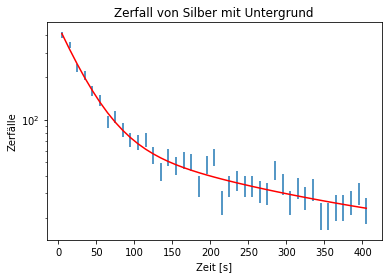

A1 = 392.4369431098054 , Standardfehler =  20.300956161099165
l1 = 0.031022135276338358 , Standardfehler =  0.0027546424384107754
A2 = 62.46300099066083 , Standardfehler =  12.45776816661776
l2 = 0.004269046919034804 , Standardfehler =  0.0007664527898467233
chi2= 35.748588550514604
chi2_red= 0.9661780689328271
Wahrscheinlichkeit=53.0%


fit mit addiertem fehler auf untergrund


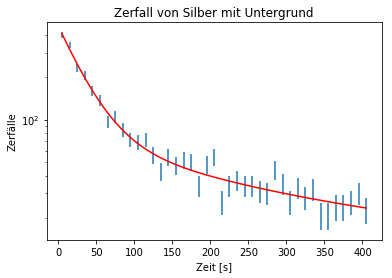

A1 = 391.2486872511236 , Standardfehler =  20.509939027863272
l1 = 0.031185374024988527 , Standardfehler =  0.0028322599681446237
A2 = 62.98075911882186 , Standardfehler =  13.147846543246152
l2 = 0.004513349843121405 , Standardfehler =  0.0008110858865631892
chi2= 35.74833292758056
chi2_red= 0.96617116020488
Wahrscheinlichkeit=53.0%


fit mit subtrahiertem fehler auf untergrund


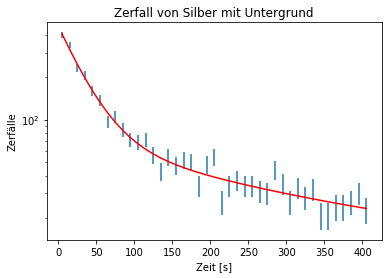

A1 = 393.4599556228378 , Standardfehler =  20.133311207335957
l1 = 0.030876915182298625 , Standardfehler =  0.002687591456114364
A2 = 62.1422585658219 , Standardfehler =  11.86550511981869
l2 = 0.0040487251381463515 , Standardfehler =  0.0007266259748704421
chi2= 35.75314721235121
chi2_red= 0.9663012760094921
Wahrscheinlichkeit=53.0%


<Figure size 432x288 with 0 Axes>

In [10]:
# coding: utf-8

# In[11]:

get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
unterg =np.loadtxt(r"Untergrundagms.dat", usecols=[1])

##berechnung der untergrundstrahlung
mittelw_ug=np.mean(4*unterg)
fehler_ug=np.std(4*unterg)/np.sqrt(len(unterg))
print("Mittelwert Untergrund: ", mittelw_ug, "\nFehler:", fehler_ug)


# In[34]:
##berechnnung und fitten des silberzerfalls
y0=mittelw_ug
n1, n2, n3, n4 = [np.loadtxt(r"silber "+str(i+1)+".dat", usecols=[1]) for i in range(4)]
N= n1+n2+n3+n4
Fehler_N=np.sqrt(N)
t=np.arange(5,415,10)

def fit_stuff(y0):
    plt.errorbar(t, N, yerr=Fehler_N, linestyle="None")
    plt.xlabel("Zeit [s]")
    plt.ylabel("Zerfälle")
    plt.yscale("log")
    plt.title("Zerfall von Silber mit Untergrund")
    def fit_func(x, A1, l1, A2, l2):
        return A1*np.exp(-x*l1)+A2*np.exp(-x*l2)+y0
    popt, pcov=optimize.curve_fit(fit_func, t, N, p0=[500,0.02,50,0.001], sigma=Fehler_N)
    plt.plot(t, fit_func(t, *popt), color="red")
    plt.show()
    plt.savefig(r"silber.pdf", format="pdf")
    names=["A1", "l1", "A2", "l2"]
    for x in range(len(popt)):
        print(names[x],"=",popt[x], ", Standardfehler = ", np.sqrt(pcov[x][x]))


    # In[36]:
    ##berechnung der chi2 summe
    chi2_=np.sum((fit_func(t, *popt)-N)**2/Fehler_N**2)
    dof=len(N)-4##degrees of freedom
    chi2_red=chi2_/dof
    print("chi2=", chi2_)
    print("chi2_red=", chi2_red)


    # In[38]:
    ##berechnung der fitwahrscheinlichkeit
    from scipy.stats import chi2
    prob=round(1-chi2.cdf(chi2_, dof),2)*100
    print("Wahrscheinlichkeit="+str(prob)+"%")
print("\n\nfit uhne untergrundfehler")
fit_stuff(y0)
print("\n\nfit mit addiertem fehler auf untergrund")
fit_stuff(y0+fehler_ug)
print("\n\nfit mit subtrahiertem fehler auf untergrund")
fit_stuff(y0-fehler_ug)


# In[ ]:


